<h1>Project 2- Classification </h1>

# Group 15
## Aadith Narayan Ravishankar AXR180085
## Mohanram Balaji Senthil Kumar MXS180135


Data Description 
<ol><li>Gender: Gender of the passengers (Female, Male)</li> <li>Customer Type: The customer type (Loyal customer, disloyal customer) </li><li>Age: The actual age of the passengers </li><li>Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) </li><li>Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) <li>Flight distance: The flight distance of this journey </li><li>Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) </li><li>Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient </li><li>Ease of Online booking: Satisfaction level of online booking <li>Gate location: Satisfaction level of Gate location </li><li>Food and drink: Satisfaction level of Food and drink </li><li>Online boarding: Satisfaction level of online boarding </li><li>Seat comfort: Satisfaction level of Seat comfort </li><li>Inflight entertainment: Satisfaction level of inflight entertainment </li><li>On-board service: Satisfaction level of On-board service </li><li>Leg room service: Satisfaction level of Leg room service </li><li>Baggage handling: Satisfaction level of baggage handling </li><li>Check-in service: Satisfaction level of Check-in service </li><li>Inflight service: Satisfaction level of inflight service </li><li>Cleanliness: Satisfaction level of Cleanliness </li><li>Departure Delay in Minutes: Minutes delayed when departure </li><li>Arrival Delay in Minutes: Minutes delayed when Arrival </li><li>Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)</li></ol>

<h1>Pre- Processing </h1>
<h3> Exploratory Data Analysis </h3>

In [1]:
#Importing the required packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
flight=pd.read_csv("flight.csv")

flight.head()

df=pd.DataFrame(flight)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1100 non-null   int64  
 1   Gender                             1100 non-null   object 
 2   Customer Type                      1100 non-null   object 
 3   Age                                1089 non-null   float64
 4   Type of Travel                     1100 non-null   object 
 5   Class                              1100 non-null   object 
 6   Flight Distance                    1100 non-null   int64  
 7   Inflight wifi service              1100 non-null   int64  
 8   Departure/Arrival time convenient  1100 non-null   int64  
 9   Ease of Online booking             1100 non-null   int64  
 10  Gate location                      1100 non-null   int64  
 11  Food and drink                     1094 non-null   float

In [3]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                  11
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        6
Online boarding                      11
Seat comfort                          0
Inflight entertainment               10
On-board service                      0
Leg room service                     10
Baggage handling                      0
Checkin service                       0
Inflight service                     10
Cleanliness                          10
Departure Delay in Minutes            0
Arrival Delay in Minutes              2
satisfaction                          0
dtype: int64

In [4]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,1100.000000,1089.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000,1089.000000,1100.000000,1090.000000,1100.000000,1090.000000,1100.000000,1100.000000,1090.000000,1090.000000,1100.000000,1098.000000
mean,63314.668182,39.292929,1222.157273,2.701818,3.115455,2.782727,3.071818,3.237660,3.240588,3.493636,3.357798,3.383636,3.346789,3.660000,3.380000,3.666055,3.289908,15.332727,15.849727
std,37743.628643,15.721542,1026.014684,1.343673,1.542347,1.428003,1.277411,1.318532,1.361554,1.280126,1.345829,1.264805,1.317716,1.181769,1.230179,1.187803,1.308442,43.933404,43.846403
min,90.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,29720.250000,27.000000,416.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,62604.500000,40.000000,861.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,96577.000000,51.000000,1789.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129767.000000,80.000000,3985.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,951.000000,940.000000


In [5]:
df.rename(columns={"Departure Delay in Minutes": "Depdelay", "Arrival Delay in Minutes": "Arrdelay"})

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Depdelay,Arrdelay,satisfaction
0,38729,Female,Loyal Customer,29.0,Personal Travel,Business,354,3,3,3,...,5.0,2,2.0,2,5,5.0,5.0,0,0.0,neutral or dissatisfied
1,129651,Female,disloyal Customer,38.0,Business travel,Business,447,2,2,2,...,5.0,3,2.0,4,5,5.0,5.0,0,0.0,neutral or dissatisfied
2,97346,Male,Loyal Customer,54.0,Business travel,Business,872,1,2,2,...,1.0,1,1.0,1,3,1.0,3.0,2,0.0,neutral or dissatisfied
3,35305,Female,Loyal Customer,59.0,Business travel,Eco,1035,4,2,2,...,4.0,4,4.0,4,1,4.0,5.0,0,0.0,satisfied
4,63250,Male,Loyal Customer,42.0,Business travel,Business,3908,2,2,2,...,5.0,5,5.0,5,3,5.0,3.0,11,8.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,56128,Female,Loyal Customer,51.0,Business travel,Business,1400,5,5,4,...,4.0,4,5.0,4,3,4.0,5.0,18,35.0,satisfied
1096,90,Male,Loyal Customer,41.0,Business travel,Business,2865,2,2,4,...,5.0,5,5.0,5,4,5.0,3.0,72,78.0,satisfied
1097,9689,Male,Loyal Customer,45.0,Business travel,Business,3166,1,1,1,...,5.0,5,5.0,5,2,5.0,3.0,40,68.0,satisfied
1098,91516,Female,Loyal Customer,66.0,Personal Travel,Eco,1626,3,4,3,...,5.0,5,3.0,5,4,5.0,5.0,0,0.0,neutral or dissatisfied


<h3> Imputing Null values in the dataset </h3>

In [6]:
df['Age']=df[['Age']].transform(lambda x: x.fillna(x.median()))

df['Online boarding']=df[['Online boarding']].transform(lambda x: x.fillna(int(x.mean())))

df['Food and drink']=df[['Food and drink','Class']].groupby(['Class']).transform(lambda x: x.fillna(int(x.mean())))

df['Inflight entertainment']=df[['Inflight entertainment','Class']].groupby(['Class']).transform(lambda x: x.fillna(int(x.mean())))

df['Leg room service']=df[['Leg room service','Class']].groupby(['Class']).transform(lambda x: x.fillna(int(x.mean())))

df['Inflight service']=df[['Inflight service','Class']].groupby(['Class']).transform(lambda x: x.fillna(int(x.mean())))

df['Cleanliness']=df[['Cleanliness','Class']].groupby(['Class']).transform(lambda x: x.fillna(int(x.mean())))

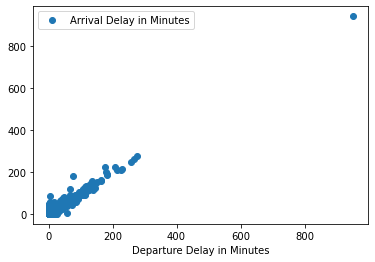

In [7]:
df.plot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', style='o')

In [8]:
df['Arrival Delay in Minutes']=df[['Arrival Delay in Minutes','Departure Delay in Minutes']].groupby(['Departure Delay in Minutes']).transform(lambda x: x.fillna(int(x.mean())))

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1100 non-null   int64  
 1   Gender                             1100 non-null   object 
 2   Customer Type                      1100 non-null   object 
 3   Age                                1100 non-null   float64
 4   Type of Travel                     1100 non-null   object 
 5   Class                              1100 non-null   object 
 6   Flight Distance                    1100 non-null   int64  
 7   Inflight wifi service              1100 non-null   int64  
 8   Departure/Arrival time convenient  1100 non-null   int64  
 9   Ease of Online booking             1100 non-null   int64  
 10  Gate location                      1100 non-null   int64  
 11  Food and drink                     1100 non-null   float

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,38729,Female,Loyal Customer,29.0,Personal Travel,Business,354,3,3,3,...,5.0,2,2.0,2,5,5.0,5.0,0,0.0,neutral or dissatisfied
1,129651,Female,disloyal Customer,38.0,Business travel,Business,447,2,2,2,...,5.0,3,2.0,4,5,5.0,5.0,0,0.0,neutral or dissatisfied
2,97346,Male,Loyal Customer,54.0,Business travel,Business,872,1,2,2,...,1.0,1,1.0,1,3,1.0,3.0,2,0.0,neutral or dissatisfied
3,35305,Female,Loyal Customer,59.0,Business travel,Eco,1035,4,2,2,...,4.0,4,4.0,4,1,4.0,5.0,0,0.0,satisfied
4,63250,Male,Loyal Customer,42.0,Business travel,Business,3908,2,2,2,...,5.0,5,5.0,5,3,5.0,3.0,11,8.0,satisfied


In [10]:
df['Gender']=pd.factorize(df['Gender'])[0]

df['satisfaction']=pd.factorize(df['satisfaction'])[0]

df['Type of Travel']=pd.factorize(df['Type of Travel'])[0]

df['Customer Type']=pd.factorize(df['Customer Type'])[0]

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,38729,0,0,29.0,0,Business,354,3,3,3,...,5.0,2,2.0,2,5,5.0,5.0,0,0.0,0
1,129651,0,1,38.0,1,Business,447,2,2,2,...,5.0,3,2.0,4,5,5.0,5.0,0,0.0,0
2,97346,1,0,54.0,1,Business,872,1,2,2,...,1.0,1,1.0,1,3,1.0,3.0,2,0.0,0
3,35305,0,0,59.0,1,Eco,1035,4,2,2,...,4.0,4,4.0,4,1,4.0,5.0,0,0.0,1
4,63250,1,0,42.0,1,Business,3908,2,2,2,...,5.0,5,5.0,5,3,5.0,3.0,11,8.0,1


<h3> Using one hot encoding to convert categorical features to numerical features </h3>

In [11]:
cl=pd.get_dummies(df['Class'],columns='Class',prefix='Class')

df[cl.columns]= cl

df.drop(('Class'),axis=1, inplace=True)

df = df.set_index('id')

<h3> Splitting the data into train and test sets </h3>

In [12]:
X=df.drop('satisfaction',axis=1)
Y=df['satisfaction']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC

In [14]:
X_train_org,X_test_org,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)

X_train_df= pd.DataFrame(X_train,columns=X_train_org.columns)

X_test_df= pd.DataFrame(X_test,columns=X_test_org.columns)

<h3> Voting Classifiers </h3>

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<h4> Hard Voting </h4>

In [16]:
log_clf = LogisticRegression(C=100, penalty= 'l2')
svc_clf = SVC(kernel = 'linear', gamma = 1, C=1, probability=True)
dt_clf = DecisionTreeClassifier(max_depth= 5)

In [17]:
log_clf.fit(X_train, Y_train)
svc_clf.fit(X_train, Y_train)
dt_clf.fit(X_train, Y_train)

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(max_depth=5)

In [18]:
voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'hard')

In [19]:
print('log_clf: ', log_clf.score(X_train, Y_train))
print('svc_clf: ', svc_clf.score(X_train, Y_train))
print('dt_clf: ', dt_clf.score(X_train, Y_train))

log_clf:  0.8761363636363636
svc_clf:  0.8715909090909091
dt_clf:  0.9193181818181818


In [20]:
voting.fit(X_train, Y_train)
print('vot_clf Train: ', voting.score(X_train, Y_train))
print('vot_clf Test: ', voting.score(X_test, Y_test))

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


vot_clf Train:  0.8818181818181818
vot_clf Test:  0.8545454545454545


<h4>Soft voting </h4>

In [21]:
soft_voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'soft')

In [22]:
soft_voting.fit(X_train, Y_train)
print('vot_clf Train: ', soft_voting.score(X_train, Y_train))
print('vot_clf Test: ', soft_voting.score(X_test, Y_test))

vot_clf Train:  0.9034090909090909
vot_clf Test:  0.8863636363636364


D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
voting_classifier_comparision=pd.DataFrame(columns=['Hard Voting',' Soft Voting'],
                                   index=['Train','Test'])

In [24]:
voting_classifier_comparision.loc['Train'] = [voting.score(X_train, Y_train),soft_voting.score(X_train, Y_train)]
voting_classifier_comparision.loc['Test'] = [voting.score(X_test, Y_test),soft_voting.score(X_train, Y_train)]
voting_classifier_comparision

,Hard Voting,Soft Voting
Train,0.881818,0.903409
Test,0.854545,0.903409


<h3>Bagging Classifier with Decision Tree Classifier</h3>

In [25]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 5)
bag_clf = BaggingClassifier(dt_clf, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid.fit(X_train, Y_train)
train=grid.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid.score(X_test,Y_test)))

Best Parameters: {'max_samples': 200, 'n_estimators': 50}
Train score: 0.9293560606060605
Test score: 0.95


<h3>Bagging Classifier with Logistic Regression</h3>

In [26]:
log_clf.fit(X_train, Y_train)
bag_clf = BaggingClassifier(log_clf, bootstrap=True, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid1=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid1.fit(X_train, Y_train)
train=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid1.score(X_test,Y_test)))

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'max_samples': 300, 'n_estimators': 50}
Train score: 0.8725378787878788
Test score: 0.8590909090909091


<h3>Pasting with Decision Tree Classifier</h3>

In [27]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 5)
bag_clf = BaggingClassifier(dt_clf, bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid.fit(X_train, Y_train)
train=grid.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid.score(X_test,Y_test)))

Best Parameters: {'max_samples': 300, 'n_estimators': 150}
Train score: 0.929229797979798
Test score: 0.9363636363636364


<h3>Pasting with Logistic Regression</h3>

In [28]:
log_clf.fit(X_train, Y_train)
bag_clf = BaggingClassifier(log_clf, bootstrap=False, n_jobs=-1, random_state=0)
param_grid={'n_estimators':[50,100,150],'max_samples':[100,200,300]}
grid1=GridSearchCV(bag_clf,param_grid,cv=5,return_train_score=True)
grid1.fit(X_train, Y_train)
train=grid1.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid1.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid1.score(X_test,Y_test)))

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'max_samples': 200, 'n_estimators': 50}
Train score: 0.8727272727272727
Test score: 0.8454545454545455


<h3>Adaboosting using Logistic Regression</h3>

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(LogisticRegression(solver="lbfgs"), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid4=GridSearchCV(ada_clf,param_grid,cv=5,return_train_score=True)
grid4.fit(X_train, Y_train)
train=grid4.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid4.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 150}
Train score: 0.8546401515151515
Test score: 0.8454545454545455


<h3>Adaboosting using Decision Tree Classifier</h3>

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid4=GridSearchCV(ada_clf,param_grid,cv=5,return_train_score=True)
grid4.fit(X_train, Y_train)
train=grid4.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid4.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid4.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.9506155303030304
Test score: 0.9318181818181818


<h3>Gradient Boosting Classifier</h3>

In [31]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid6=GridSearchCV(gbrt,param_grid,cv=5,return_train_score=True)
grid6.fit(X_train, Y_train)
train=grid6.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid6.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid6.score(X_test,Y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Train score: 0.9960700757575757
Test score: 0.9318181818181818


<h3>PCA with KNN Classifier </h3>

In [32]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("knn", KNeighborsClassifier())
    ])
param_grid5 = {'knn__n_neighbors': [3,5,7,10,19],'knn__weights': ['uniform','distance'],'knn__metric': ['euclidean','manhattan']}
grid7=GridSearchCV(clf,param_grid5,cv=3,return_train_score=True)
grid7.fit(X_train,Y_train)
train=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid7.score(X_test,Y_test)))

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Train score: 0.9416782951821123
Test score: 0.8772727272727273


<h3>PCA with Logistic Regression </h3>

In [33]:
clf1 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lr", LogisticRegression())
    ])
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
hyperparameters = {"lr__C":C, "lr__penalty":penalty}
grid8=GridSearchCV(clf1,hyperparameters,cv=3,return_train_score=True)
grid8.fit(X_train,Y_train)
train=grid8.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid8.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid8.score(X_test,Y_test)))

D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Softwares\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

Best Parameters: {'lr__C': 1, 'lr__penalty': 'l2'}
Train score: nan
Test score: 0.8590909090909091


<h3>PCA with Decision Tree Classifier </h3>

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_para = {'dt__criterion':['gini','entropy'],'dt__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf2 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("dt", DecisionTreeClassifier())
    ])
grid9=GridSearchCV(clf2,tree_para,cv=3,return_train_score=True)
grid9.fit(X_train,Y_train)
train=grid9.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid9.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid9.score(X_test,Y_test)))

Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 4}
Train score: 0.9804281048728433
Test score: 0.8545454545454545


<h3>PCA with Linear SVC </h3>

In [35]:
clf5 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvr", LinearSVC())
    ])
parameters2={'lsvr__C':[1,10,100]}
grid12=GridSearchCV(clf5,parameters2,cv=3,return_train_score=True)
grid12.fit(X_train,Y_train)
train=grid12.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid12.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid12.score(X_test,Y_test)))

Best Parameters: {'lsvr__C': 100}
Train score: 0.8621261836052145
Test score: 0.8590909090909091


D:\Softwares\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Softwares\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Softwares\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Softwares\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Softwares\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

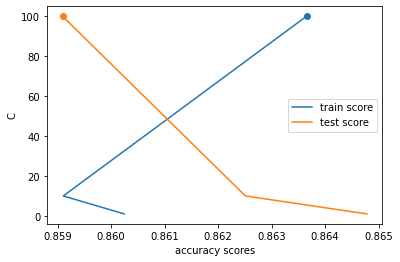

In [36]:
C=[1,10,100]
means = grid12.cv_results_['mean_test_score']
for i in C:
    if i==grid12.best_params_['lsvr__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3>PCA with SVC with Linear Kernel </h3>

In [37]:
clf6 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("lsvrk", SVC(kernel='linear'))
    ])
parameters2={"lsvrk__C":[1,10,100]}
grid13=GridSearchCV(clf6,parameters2,cv=3,return_train_score=True)
grid13.fit(X_train,Y_train)
train=grid13.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid13.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid13.score(X_test,Y_test)))

Best Parameters: {'lsvrk__C': 1}
Train score: 0.8734885352528137
Test score: 0.8636363636363636


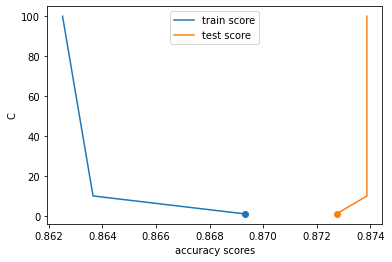

In [38]:
C=[1,10,100]
means = grid13.cv_results_['mean_test_score']
for i in C:
    if i==grid13.best_params_['lsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3>PCA with SVC with RBF Kernel </h3>

In [39]:
clf7 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("rsvrk", SVC(kernel='rbf',C=100,gamma=1))
    ])
parameters2={"rsvrk__C":[1,10,100]}
grid14=GridSearchCV(clf7,parameters2,cv=3,return_train_score=True)
grid14.fit(X_train,Y_train)
train=grid14.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid14.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid14.score(X_test,Y_test)))

Best Parameters: {'rsvrk__C': 1}
Train score: 0.9850389458363131
Test score: 0.9136363636363637


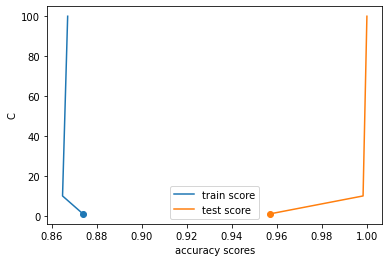

In [40]:
C=[1,10,100]
means = grid14.cv_results_['mean_test_score']
for i in C:
    if i==grid14.best_params_['rsvrk__C']:
        ind=C.index(i)

plt.plot(means,C,label="train score")
plt.plot(train,C,label="test score")
plt.scatter(means[ind],C[ind])
plt.scatter(train[ind],C[ind])
plt.xlabel("accuracy scores")
plt.ylabel("C")
plt.legend(loc="best")
plt.show()

<h3>PCA with SVC with Poly Kernel </h3>

In [41]:
clf8 = Pipeline([
        ("pca", PCA(n_components=0.95)),
        ("psvrk", SVC(kernel='poly',C=100,degree=1))
    ])
parameters2={"psvrk__C":[1,10,100],"psvrk__degree":[1,2,3]}
grid15=GridSearchCV(clf8,parameters2,cv=3,return_train_score=True)
grid15.fit(X_train,Y_train)
train=grid15.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid15.best_params_))
print("Train score: {}".format(train.mean()))
print("Test score: {}".format(grid15.score(X_test,Y_test)))

Best Parameters: {'psvrk__C': 1, 'psvrk__degree': 3}
Train score: 0.9224799015107811
Test score: 0.9045454545454545


<h3>Scores of algorithms without PCA </h3>
<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Train Score</th> 
    <th>Test Score</th>
  </tr>
  <tr>
    <td>K Nearest Neighbors Classifier</td>
    <td>0.9443201341970235</td> 
    <td>0.8863636363636364</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.7950520833333333</td> 
    <td>0.8647727272727272</td>
  </tr>
    <tr>
    <td>Decision Tree Classifier</td>
    <td>0.9809738005050505</td> 
    <td>0.8886363636363637</td>
  </tr>
    <tr>
    <td>Linear SVC</td>
    <td>0.8324810606060605</td> 
    <td>0.865909090909091</td>
  </tr>
    <tr>
    <td>SVC with linear kernel</td>
    <td>0.8090435606060605</td> 
    <td>0.8693181818181818</td>
  </tr>
    <tr>
    <td>SVC with RBF kernel</td>
    <td>0.7608585858585859</td> 
    <td>0.8886363636363637</td>
  </tr>
    <tr>
    <td>SVC with poly kernel</td>
    <td>0.7071575126262627</td> 
    <td>0.8852272727272728</td>
  </tr>
</table>

<h3>Scores of algorithms with PCA </h3>
<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Train Score</th> 
    <th>Test Score</th>
  </tr>
  <tr>
    <td>K Nearest Neighbors Classifier</td>
    <td>0.9421287912206978</td> 
    <td>0.8772727272727273</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.8142948400444743</td> 
    <td>0.8590909090909091</td>
  </tr>
    <tr>
    <td>Decision Tree Classifier</td>
    <td>0.9797817148601319</td> 
    <td>0.8545454545454545</td>
  </tr>
    <tr>
    <td>Linear SVC</td>
    <td>0.8621217163391711</td> 
    <td>0.8636363636363636</td>
  </tr>
    <tr>
    <td>SVC with linear kernel</td>
    <td>0.8740522754418415</td> 
    <td>0.8636363636363636</td>
  </tr>
    <tr>
    <td>SVC with RBF kernel</td>
    <td>0.9852285244776713</td> 
    <td>0.9136363636363637</td>
  </tr>
    <tr>
    <td>SVC with poly kernel</td>
    <td>0.8014535861114765</td> 
    <td>0.8681818181818182</td>
  </tr>
</table>

PCA performs considerably well with algorithms using Kernel trick than without PCA. PCA, achieves a better training and testing score in certain algorithms like Logistic Regression and Linear SVC.

<h3> Deep Learning for Classification </h3>

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [43]:
# Step 1: Build the model
model1 = Sequential()
#Input leyer
model1.add(Dense(126, input_dim = 24, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model1.fit(X_train, Y_train, epochs = 30, batch_size = 50)

Epoch 1/30
18/18 [==============================] - 0s 665us/step - loss: 0.4242 - mean_absolute_error: 0.4242
Epoch 2/30
18/18 [==============================] - 0s 609us/step - loss: 0.3836 - mean_absolute_error: 0.3836
Epoch 3/30
18/18 [==============================] - 0s 554us/step - loss: 0.2787 - mean_absolute_error: 0.2787
Epoch 4/30
18/18 [==============================] - 0s 554us/step - loss: 0.2356 - mean_absolute_error: 0.2356
Epoch 5/30
18/18 [==============================] - 0s 609us/step - loss: 0.2241 - mean_absolute_error: 0.2241
Epoch 6/30
18/18 [==============================] - 0s 609us/step - loss: 0.2140 - mean_absolute_error: 0.2140
Epoch 7/30
18/18 [==============================] - 0s 610us/step - loss: 0.2022 - mean_absolute_error: 0.2022
Epoch 8/30
18/18 [==============================] - 0s 610us/step - loss: 0.1954 - mean_absolute_error: 0.1954
Epoch 9/30
18/18 [==============================] - 0s 609us/step - loss: 0.1866 - mean_absolute_error: 0.1866
E

In [44]:
seed = 10
np.random.seed(10)

In [45]:
loss_and_metrics = model1.evaluate(X_test, Y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

7/7 [==============================] - 0s 536us/step - loss: 0.1279 - mean_absolute_error: 0.1279
Test Loss 0.1279391646385193
Test Accuracy 0.1279391646385193
